In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
data = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')

# Menghapus kolom yang tidak diperlukan
data.drop(['No','KELURAHAN', 'KECAMATAN','PEKERJAAN','JK','TANGGAL DAFTAR', 'Tgl Diagnosa Akhir', 'LAMA PENGOBATAN', 'Tgl Diagnosa Akhir', 'TGL AWAL TERIMA OBAT TAHAP I','TGL AKHIR TERIMA OBAT TAHAP I','TGL AWAL TERIMA OBAT TAHAP II','TGL AKHIR TERIMA OBAT TAHAP II','TANGGAL AKHIR PENGOBATAN','BULAN Ke 1','OAT 1','OAT 3','RO AP', 'BULAN KE 3','BULAN KE 4','OAT 2'], axis=1, inplace=True)

# lower case semua data
data = data.apply(lambda x: x.astype(str).str.lower())

# ubah data menjadi numerk
data['Lama Batuk'] = data['Lama Batuk'].map({'tidak': 0, '3 bln': 1, '> 1 bln': 2, '> 3 bln': 3, '> 2 bln': 4, '± 1 bln': 5, '>  3 bln': 6, '> 4 bln': 7, '± 2 mg': 8, '> 2 mg': 9, '> 5 bln': 10, '> 1 mg': 11, '> 6 bln': 12, 't': 13, '> 3 mg': 14, '> 4 mg': 15, '> 1 th': 16})
data['Dahak'] = data['Dahak'].map({'tidak': 0, 'ya': 1,'y': 1, 't': 0})
data['Darah'] = data['Darah'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Demam >1Bln'] = data['Demam >1Bln'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Turun BB'] = data['Turun BB'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Turun Nafsu Makan'] = data['Turun Nafsu Makan'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Keringat Malam'] = data['Keringat Malam'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Sesak'] = data['Sesak'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['Nyeri Dada'] = data['Nyeri Dada'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['PENYAKIT PENYERTA'] = data['PENYAKIT PENYERTA'].map({'tidak': 0, 'dm': 1, 'kardiomegali': 2, 'covid 19': 3, 'hiv': 4})
data['RONCHI'] = data['RONCHI'].map({'tidak': 0, 'ya': 1, 't': 0, 'y': 1})
data['DIAGNOSA AWAL']=data['DIAGNOSA AWAL'].map({'tb klinis': 0, 'efusi pleura': 1, 'tb bta positif': 2, 'limfadenitis': 3, 'dispepsia': 4, 'hemaptoe': 5, 'bekas tb': 6, 'chest pain': 7, 'pneumonia': 8, 'bronchitis': 9, 'ppok': 10, 'pleuritis': 11, 'tb pulmo': 12, 'bronchopneumonia': 13, 'tumor paru': 14, 'tb milier': 15, 'tb kambuh': 16, 'pneumothorax': 17, 'be': 18})
data['RO Awal'] = data['RO Awal'].map({'infiltrat': 0, 'efusi pleura': 1, 'tb pulmo': 2, 'bronchitis': 3, 'pneumonia': 4, 'masa mediasmitum': 5, 'bekas tb': 6, 'bronchopneumonia': 7, 'pleuritis': 8, 'tb milier': 9, 'tb klinis': 10, 'bronkopneumonia': 11, 'pleuropneumonia': 12, 'pneumothorax': 13})
data['DAHAK AWAL'] = data['DAHAK AWAL'].map({'rif sen': 1, 'neg': 0})
data['Diagnosa AKHIR'] = data['Diagnosa AKHIR'].map({'tb paru bta pos': 1, 'tb paru bta neg': 0, 'nan':0})
data['Akhir intensif'] = data['Akhir intensif'].map({'neg': 0, 'tdk dilakukan': 0, 'tidak dilakukan': 0, '+1/neg': 1, '+2/neg': 2, '+1/+1': 3, '+1/+2': 4})
data['PATUH OAT 1 (Y/T)'] = data['PATUH OAT 1 (Y/T)'].map({'y': 1, 't': 0})
data['Hasil Dahak Bln Ke 5']= data['Hasil Dahak Bln Ke 5'].map({'neg': 0, 'tidak dilakukan': 0, 'nan': 0,'nan':0})
data['DAHAK AP'] = data['DAHAK AP'].map({'neg': 0, 'tidak dilakukan': 0, 'nan': 0,'nan':0})
data['PATUH OAT AKHIR (Y/T)'] = data['PATUH OAT AKHIR (Y/T)'].map({'y': 1, 't': 0})
data['Hasil Akhir Pengobatan'] = data['Hasil Akhir Pengobatan'].map({'sembuh':1,'pengobatan lengkap':0})


# save data
data = data.dropna()
# Menghapus data yang tidak diperlukan

# Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()
data['Diagnosa AKHIR'] = le.fit_transform(data['Diagnosa AKHIR'])
data['Akhir intensif'] = le.fit_transform(data['Akhir intensif'])
data['PATUH OAT 1 (Y/T)'] = le.fit_transform(data['PATUH OAT 1 (Y/T)'])
data['Hasil Dahak Bln Ke 5'] = le.fit_transform(data['Hasil Dahak Bln Ke 5'])
data['DAHAK AP'] = le.fit_transform(data['DAHAK AP'])
data['PATUH OAT AKHIR (Y/T)'] = le.fit_transform(data['PATUH OAT AKHIR (Y/T)'])
data['Hasil Akhir Pengobatan'] = le.fit_transform(data['Hasil Akhir Pengobatan'])

# Memisahkan fitur dan target
X = data.drop('Hasil Akhir Pengobatan', axis=1)
y = data['Hasil Akhir Pengobatan']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Membuat model Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

# tambahkan field prediksi
data['prediksi'] = model.predict(X)
data.to_excel('prediksi.xlsx')


print("Prediksi:", y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)







Prediksi: [1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 1 1]
Akurasi:  0.8571428571428571


In [8]:
# ini 
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Fungsi untuk mengubah nilai pada kolom menjadi angka
def map_values(column, mapping):
    return column.map(mapping)

# Membaca data dari file CSV
data = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')

# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['No', 'KELURAHAN', 'KECAMATAN', 'PEKERJAAN', 'JK', 'TANGGAL DAFTAR', 'Tgl Diagnosa Akhir',
                   'LAMA PENGOBATAN', 'Tgl Diagnosa Akhir', 'TGL AWAL TERIMA OBAT TAHAP I', 'TGL AKHIR TERIMA OBAT TAHAP I',
                   'TGL AWAL TERIMA OBAT TAHAP II', 'TGL AKHIR TERIMA OBAT TAHAP II', 'TANGGAL AKHIR PENGOBATAN',
                   'BULAN Ke 1', 'OAT 1', 'OAT 3', 'RO AP', 'BULAN KE 3', 'BULAN KE 4', 'OAT 2']
data.drop(columns_to_drop, axis=1, inplace=True)

# Lower case semua data
data = data.apply(lambda x: x.astype(str).str.lower())

# Mappings untuk mengubah data menjadi numerik
# Pada setiap mapping ini sebenernya bisa disesuaiin dengan data yang ada di excel saya hanya menyesuaikand datanya saja mas agar bisa di categorize
mappings = {
    'Lama Batuk': {'tidak': 0, '3 bln': 1, '> 1 bln': 2, '> 3 bln': 3, '> 2 bln': 4, '± 1 bln': 5, '>  3 bln': 6,
                   '> 4 bln': 7, '± 2 mg': 8, '> 2 mg': 9, '> 5 bln': 10, '> 1 mg': 11, '> 6 bln': 12, 't': 13,
                   '> 3 mg': 14, '> 4 mg': 15, '> 1 th': 16},
    'Dahak': {'tidak': 0, 'ya': 1, 'y': 1, 't': 0},
    'Darah': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Demam >1Bln': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Turun BB': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Turun Nafsu Makan': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Keringat Malam': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Sesak': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'Nyeri Dada': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'PENYAKIT PENYERTA': {'tidak': 0, 'dm': 1, 'kardiomegali': 2, 'covid 19': 3, 'hiv': 4},
    'RONCHI': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
    'DIAGNOSA AWAL': {'tb klinis': 0, 'efusi pleura': 1, 'tb bta positif': 2, 'limfadenitis': 3, 'dispepsia': 4,
                      'hemaptoe': 5, 'bekas tb': 6, 'chest pain': 7, 'pneumonia': 8, 'bronchitis': 9, 'ppok': 10,
                      'pleuritis': 11, 'tb pulmo': 12, 'bronchopneumonia': 13, 'tumor paru': 14, 'tb milier': 15,
                      'tb kambuh': 16, 'pneumothorax': 17, 'be': 18},
    'RO Awal': {'infiltrat': 0, 'efusi pleura': 1, 'tb pulmo': 2, 'bronchitis': 3, 'pneumonia': 4,
                'masa mediasmitum': 5, 'bekas tb': 6, 'bronchopneumonia': 7, 'pleuritis': 8, 'tb milier': 9,
                'tb klinis': 10, 'bronkopneumonia': 11, 'pleuropneumonia': 12, 'pneumothorax': 13},
    'DAHAK AWAL': {'rif sen': 1, 'neg': 0},
    'Diagnosa AKHIR': {'tb paru bta pos': 1, 'tb paru bta neg': 0, 'nan': 0},
    'Akhir intensif': {'neg': 0, 'tdk dilakukan': 0, 'tidak dilakukan': 0, '+1/neg': 1, '+2/neg': 2, '+1/+1': 3, '+1/+2': 4},
    'PATUH OAT 1 (Y/T)': {'y': 1, 't': 0},
    'Hasil Dahak Bln Ke 5': {'neg': 0, 'tidak dilakukan': 0, 'nan': 0, 'nan': 0},
    'DAHAK AP': {'neg': 0, 'tidak dilakukan': 0, 'nan': 0, 'nan': 0},
    'PATUH OAT AKHIR (Y/T)': {'y': 1, 't': 0},
    'Hasil Akhir Pengobatan': {'sembuh': 1, 'pengobatan lengkap': 0}
}

# Ubah data menjadi numerik
# Untuk setiap kolom kategorikal, ubah nilai string menjadi nilai numerik
for column, mapping in mappings.items():
    data[column] = map_values(data[column], mapping)

# Hapus baris dengan nilai kosong
data = data.dropna()

# Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Diagnosa AKHIR', 'Akhir intensif', 'PATUH OAT 1 (Y/T)', 'Hasil Dahak Bln Ke 5', 'DAHAK AP', 'PATUH OAT AKHIR (Y/T)', 'Hasil Akhir Pengobatan']
le = LabelEncoder()

data[categorical_columns] = data[categorical_columns].apply(le.fit_transform)

# Memisahkan fitur dan target
X = data.drop('Hasil Akhir Pengobatan', axis=1)
y = data['Hasil Akhir Pengobatan']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Membuat model Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data uji
y_pred = model.predict(X_test)

print("Prediksi:", y_pred)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: ", accuracy)

Prediksi: [1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 1 1]
Akurasi:  0.8367346938775511


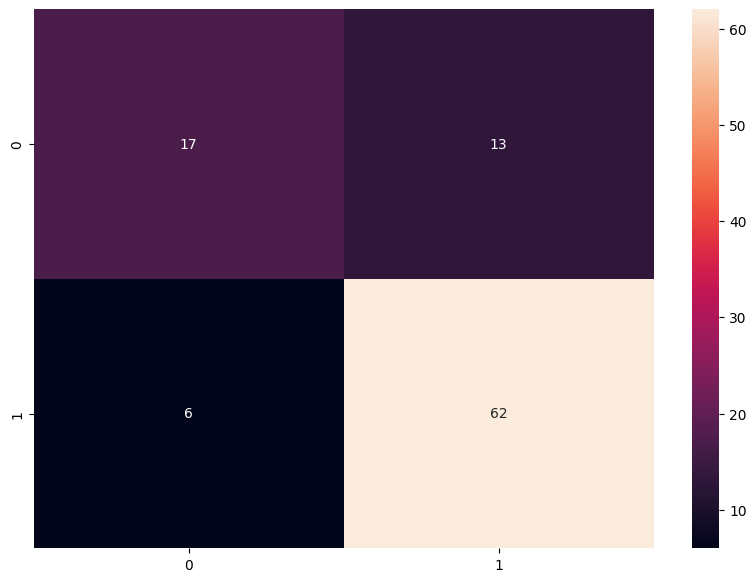

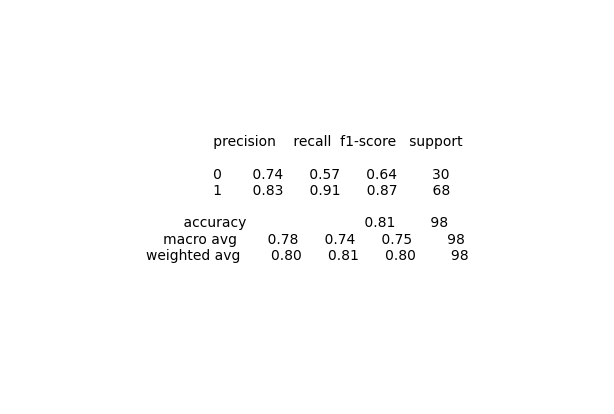

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter.ttk import Progressbar
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# iya mas ini GUI tapi sudah saya pisah ke file berbeda bentar saya buka

class GUI(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("Gradient Boosting Classifier")
        # self.geometry("800x600")
        # halam berada di posisi tengah
        self.geometry("+{}+{}".format(int(self.winfo_screenwidth()/2 - 800/2), int(self.winfo_screenheight()/2 - 600/2)))
        # Tampilkan halaman landing page secara otomatis fullscreen
        self.show_landing_page()

    def show_landing_page(self):
        # Hapus semua widget yang ada di window
        self.destroy_widgets()
        
        self.title("Gradient Boosting Classifier")
        self.geometry("800x600")

        # Buat frame untuk loading screen
        self.loading_frame = tk.Frame(self)
        self.loading_frame.pack(fill=tk.BOTH, expand=True)

        # Buat label dan progress bar pada loading screen
        self.loading_label = tk.Label(self.loading_frame, text="Loading...", font=("Helvetica", 24))
        self.loading_label.pack(pady=100)
        self.loading_bar = Progressbar(self.loading_frame, mode='indeterminate')
        self.loading_bar.pack(pady=10)
        self.loading_bar.start(10)  # Memulai animasi loading bar

        # Jalankan fungsi untuk menampilkan halaman landing page setelah 3 detik
        self.after(3000, self.show_train_page)

    def show_train_page(self):
        # Hapus semua widget yang ada di window
        self.destroy_widgets()

        # Buat label untuk halaman kedua
        label = tk.Label(self, text="Prognosis Masa Pengobatan Pasien TB", font=("Helvetica", 24))
   
        label.pack(pady=50)

        # Buat frame untuk kolom inputan
        frame = tk.Frame(self)
        frame.pack(pady=20)

        # Buat tombol untuk memilih file
        file_button = tk.Button(frame, text="Browse File", command=self.browse_file)
        file_button.pack(side=tk.LEFT, padx=10)

        # Buat label untuk menampilkan file yang dipilih
        self.file_label = tk.Label(frame, text="")
        self.file_label.pack(side=tk.LEFT)

        # Buat entry untuk mengatur test_size
        test_size_label = tk.Label(self, text="Test Size (%):")
        test_size_label.pack()
        self.test_size_entry = tk.Entry(self, width=30)
        self.test_size_entry.insert(0, "20")
        self.test_size_entry.configure(justify=tk.CENTER)
        self.test_size_entry.pack()

        # Buat tombol untuk melakukan pelatihan
        train_button = tk.Button(self, text="Train", command=self.train_model)
        train_button.pack(pady=20)

        # Buat label untuk menampilkan hasil pelatihan
        self.result_label = tk.Label(self, text="")
        self.result_label.pack()

        # buat label untuk menampilkan jumlah data training
        self.train_data_label = tk.Label(self, text="")
        self.train_data_label.pack()

        # buat label untuk menampilkan jumlah data testing
        self.test_data_label = tk.Label(self, text="")
        self.test_data_label.pack()

        # Buat frame untuk navbar
        navbar_frame = tk.Frame(self)
        navbar_frame.pack(pady=20)

        # Buat tombol untuk membuka file preprocessing
        preprocessing_button = tk.Button(navbar_frame, text="File Preprocessing", state=tk.DISABLED, command=self.open_preprocessing_file)
        preprocessing_button.pack(side=tk.LEFT, padx=10)

        # Buat tombol untuk membuka file prediksi
        prediction_button = tk.Button(navbar_frame, text="File Prediction", state=tk.DISABLED, command=self.open_prediction_file)
        prediction_button.pack(side=tk.LEFT, padx=10)

        # Buat tombol untuk membuka file confusion matrix
        confusion_matrix_button = tk.Button(navbar_frame, text="Confusion Matrix", state=tk.DISABLED, command=self.open_confusion_matrix_file)
        confusion_matrix_button.pack(side=tk.LEFT, padx=10)

        # Buat tombol untuk membuka file classification report
        classification_report_button = tk.Button(navbar_frame, text="Classification Report", state=tk.DISABLED, command=self.open_classification_report_file)
        classification_report_button.pack(side=tk.LEFT, padx=10)

        # page 3
        prediction_page = tk.Button(navbar_frame, text="Prediction",state=tk.DISABLED, command=self.prediction_page)
        prediction_page.pack(side=tk.LEFT, padx=10)


        # Tambahkan tombol ke dalam list untuk referensi
        self.navbar_buttons = [preprocessing_button, prediction_button, confusion_matrix_button, classification_report_button, prediction_page]


    def browse_file(self):
        # Membuka dialog untuk memilih file
        file_path = filedialog.askopenfilename(filetypes=[("Excel Files", "*.xlsx"), ("CSV Files", "*.csv")])

        # Menampilkan file yang dipilih pada label
        self.file_label.config(text="File: " + file_path)
  

    def train_model(self):
        # Mengambil nilai test_size dari entry
        test_size = float(int(self.test_size_entry.get())/100)

        # Membaca data dari file CSV
        file_path = self.file_label.cget("text")[6:]  # Mengambil.
        # Membaca data dari file CSV
        file_path = self.file_label.cget("text")[6:]  # Mengambil path file dari label
        if file_path.endswith(".csv"):
            df = pd.read_csv(file_path)
        elif file_path.endswith(".xlsx"):
            df = pd.read_excel(file_path)
        else:
            self.result_label.config(text="File format not supported")
            return
        
        # Fungsi untuk mengubah nilai pada kolom menjadi angka
        def map_values(column, mapping):
            return column.map(mapping)

        # Menghapus kolom yang tidak diperlukan
        columns_to_drop = ['No', 'KELURAHAN', 'KECAMATAN', 'PEKERJAAN', 'TANGGAL DAFTAR', 'Tgl Diagnosa Akhir',
                        'LAMA PENGOBATAN', 'Tgl Diagnosa Akhir', 'TGL AWAL TERIMA OBAT TAHAP I', 'TGL AKHIR TERIMA OBAT TAHAP I',
                        'TGL AWAL TERIMA OBAT TAHAP II', 'TGL AKHIR TERIMA OBAT TAHAP II', 'TANGGAL AKHIR PENGOBATAN',
                        'BULAN Ke 1', 'OAT 1', 'OAT 3', 'RO AP', 'BULAN KE 3', 'BULAN KE 4', 'OAT 2']
        df.drop(columns_to_drop, axis=1, inplace=True)

        # Lower case semua data
        df = df.apply(lambda x: x.astype(str).str.lower())

        # Mappings untuk mengubah data menjadi numerik
        mappings = {
            'JK': {'laki-laki': 0, 'perempuan': 1, 'p': 1, 'l': 0},
            'Lama Batuk': {'tidak': 0, '3 bln': 1, '> 1 bln': 2, '> 3 bln': 3, '> 2 bln': 4, '± 1 bln': 5, '>  3 bln': 6,
                        '> 4 bln': 7, '± 2 mg': 8, '> 2 mg': 9, '> 5 bln': 10, '> 1 mg': 11, '> 6 bln': 12, 't': 0,
                        '> 3 mg': 13, '> 4 mg': 14, '> 1 th': 15},
            'Dahak': {'tidak': 0, 'ya': 1, 'y': 1, 't': 0},
            'Darah': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Demam >1Bln': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Turun BB': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Turun Nafsu Makan': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Keringat Malam': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Sesak': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'Nyeri Dada': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'PENYAKIT PENYERTA': {'tidak': 0, 'dm': 1, 'kardiomegali': 2, 'covid 19': 3, 'hiv': 4},
            'RONCHI': {'tidak': 0, 'ya': 1, 't': 0, 'y': 1},
            'DIAGNOSA AWAL': {'tb klinis': 0, 'efusi pleura': 1, 'tb bta positif': 2, 'limfadenitis': 3, 'dispepsia': 4,
                            'hemaptoe': 5, 'bekas tb': 6, 'chest pain': 7, 'pneumonia': 8, 'bronchitis': 9, 'ppok': 10,
                            'pleuritis': 11, 'tb pulmo': 12, 'bronchopneumonia': 13, 'tumor paru': 14, 'tb milier': 15,
                            'tb kambuh': 16, 'pneumothorax': 17, 'be': 18},
            'RO Awal': {'infiltrat': 0, 'efusi pleura': 1, 'tb pulmo': 2, 'bronchitis': 3, 'pneumonia': 4,
                        'masa mediasmitum': 5, 'bekas tb': 6, 'bronchopneumonia': 7, 'pleuritis': 8, 'tb milier': 9,
                        'tb klinis': 10, 'bronkopneumonia': 11, 'pleuropneumonia': 12, 'pneumothorax': 13},
            'DAHAK AWAL': {'rif sen': 1, 'neg': 0},
            'Diagnosa AKHIR': {'tb paru bta pos': 1, 'tb paru bta neg': 0, 'nan': 0},
            'Akhir intensif': {'neg': 0, 'tdk dilakukan': 0, 'tidak dilakukan': 0, '+1/neg': 1, '+2/neg': 2, '+1/+1': 3, '+1/+2': 4},
            'PATUH OAT 1 (Y/T)': {'y': 1, 't': 0},
            'Hasil Dahak Bln Ke 5': {'neg': 0, 'tidak dilakukan': 0, 'nan': 0, 'nan': 0},
            'DAHAK AP': {'neg': 0, 'tidak dilakukan': 0, 'nan': 0, 'nan': 0},
            'PATUH OAT AKHIR (Y/T)': {'y': 1, 't': 0},
            'Hasil Akhir Pengobatan': {'sembuh': 1, 'pengobatan lengkap': 0}
        }

        # Ubah data menjadi numerik
        for column, mapping in mappings.items():
            df[column] = map_values(df[column], mapping)

        # Hapus baris dengan nilai kosong
        df = df.dropna()   
        
        # Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
        from sklearn.preprocessing import LabelEncoder

        categorical_columns = ['JK','Diagnosa AKHIR', 'Akhir intensif', 'PATUH OAT 1 (Y/T)', 'Hasil Dahak Bln Ke 5', 'DAHAK AP', 'PATUH OAT AKHIR (Y/T)', 'Hasil Akhir Pengobatan']
        le = LabelEncoder()

        df[categorical_columns] = df[categorical_columns].apply(le.fit_transform)

        # save data
        df.to_excel('data_preprocessed.xlsx', index=False)

        # Memisahkan fitur dan target
        X = df.drop('Hasil Akhir Pengobatan', axis=1)
        y = df['Hasil Akhir Pengobatan']

        le = LabelEncoder()
        y = le.fit_transform(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Training model
        model = GradientBoostingClassifier()
        model.fit(X_train, y_train)

        # save model
        pickle.dump(model, open('model.pkl', 'wb'))

        

        # Evaluasi model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # save to png file cm and cr
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True)
        plt.savefig('confusion_matrix.png')
        
        # Menghasilkan classification report sebagai gambar
        cr_text = classification_report(y_test, y_pred)
        fig = plt.figure(figsize=(6, 4))
        plt.axis('off')
        plt.tight_layout(pad=0.2)
        plt.text(0.5, 0.5, cr_text, ha='center', va='center', fontsize=10)

        # Simpan gambar sebagai file PNG
        plt.savefig('classification_report.png')

        self.result_label.config(text="Akurasi Evalusi: {:.2f}".format(accuracy))

        # jumlah data training dan testing
        self.train_data_label.config(text="Jumlah Data Training: {}".format(len(X_train)))
        self.test_data_label.config(text="Jumlah Data Testing: {}".format(len(X_test)))

        # Menyimpan data preprocessing dan prediksi ke file Excel
        df_preprocessing = pd.DataFrame(X_test, columns=X.columns)
        df_preprocessing['target'] = le.inverse_transform(y_test)
        df_preprocessing.to_excel("preprocessing.xlsx", index=False)

        df_pred = pd.DataFrame(X_test, columns=X.columns)
        df_pred['Hasil Akhir Pengobatan'] = le.inverse_transform(y_test)
        df_pred['target_predicted'] = le.inverse_transform(y_pred)
        df_pred.to_excel("prediction.xlsx", index=False)

        # Mengaktifkan tombol navbar setelah pelatihan selesai
        for button in self.navbar_buttons:
            button.configure(state=tk.NORMAL)

    
    def prediction_page(self):   
        # delete all widgets in frame
        self.destroy_widgets()

        label = tk.Label(self, text="Prediksi Tuberculosis", font=("Helvetica", 24))
        label.pack(pady=50)

        # Buat frame untuk kolom inputan
        frame = tk.Frame(self)

        # Mappings untuk mengubah data menjadi numerik
        field_data = {
            'JK': {'laki-laki': 0, 'perempuan': 1},
            'Lama Batuk': {'tidak': 0, '3 bln': 1, '> 1 bln': 2, '> 3 bln': 3, '> 2 bln': 4, '± 1 bln': 5, '>  3 bln': 6,
                        '> 4 bln': 7, '± 2 mg': 8, '> 2 mg': 9, '> 5 bln': 10, '> 1 mg': 11, '> 6 bln': 12,
                        '> 3 mg': 13, '> 4 mg': 14, '> 1 th': 15},
            'Dahak': {'tidak': 0, 'ya': 10},
            'Darah': {'tidak': 0, 'ya': 1},
            'Demam >1Bln': {'tidak': 0, 'ya': 1},
            'Turun BB': {'tidak': 0, 'ya': 1},
            'Turun Nafsu Makan': {'tidak': 0, 'ya': 1},
            'Keringat Malam': {'tidak': 0, 'ya': 1},
            'Sesak': {'tidak': 0, 'ya': 1},
            'Nyeri Dada': {'tidak': 0, 'ya': 1},
            'PENYAKIT PENYERTA': {'tidak': 0, 'dm': 1, 'kardiomegali': 2, 'covid 19': 3, 'hiv': 4},
            'RONCHI': {'tidak': 0, 'ya': 1},
            'DIAGNOSA AWAL': {'tb klinis': 0, 'efusi pleura': 1, 'tb bta positif': 2, 'limfadenitis': 3, 'dispepsia': 4,
                            'hemaptoe': 5, 'bekas tb': 6, 'chest pain': 7, 'pneumonia': 8, 'bronchitis': 9, 'ppok': 10,
                            'pleuritis': 11, 'tb pulmo': 12, 'bronchopneumonia': 13, 'tumor paru': 14, 'tb milier': 15,
                            'tb kambuh': 16, 'pneumothorax': 17, 'be': 18},
            'RO Awal': {'infiltrat': 0, 'efusi pleura': 1, 'tb pulmo': 2, 'bronchitis': 3, 'pneumonia': 4,
                        'masa mediasmitum': 5, 'bekas tb': 6, 'bronchopneumonia': 7, 'pleuritis': 8, 'tb milier': 9,
                        'tb klinis': 10, 'bronkopneumonia': 11, 'pleuropneumonia': 12, 'pneumothorax': 13},
            'DAHAK AWAL': {'rif sen': 1, 'neg': 0},
            'Diagnosa AKHIR': {'tb paru bta pos': 1, 'tb paru bta neg': 0},
            'Akhir intensif': {'neg': 0, 'tdk dilakukan': 0, 'tidak dilakukan': 0, '+1/neg': 1, '+2/neg': 2, '+1/+1': 3, '+1/+2': 4},
            'PATUH OAT 1 (Y/T)': {'y': 1, 't': 0},
            'Hasil Dahak Bln Ke 5': {'tidak dilakukan': 0,'negatif': 0, 'positif': 1},
            'DAHAK AP': {'neg': 0, 'tidak dilakukan': 0},
            'PATUH OAT AKHIR (Y/T)': {'ya': 1, 'tidak': 0}
        }

        import math

        # Menghitung jumlah kolom dan baris yang dibutuhkan
        num_columns = 3
        num_rows = math.ceil(len(field_data) / num_columns)

        # Loop melalui data field_data
        for index, (field, options) in enumerate(field_data.items()):
            # Menghitung posisi baris dan kolom
            row = index // num_columns
            column = index % num_columns

            # Buat label dan dropdown menu untuk setiap field
            label = tk.Label(frame, text=field, font=("Helvetica", 12))
            label.grid(row=row, column=2*column, sticky=tk.W, padx=10, pady=10)

            field_var = tk.StringVar(frame)
            dropdown = tk.OptionMenu(frame, field_var, *options.keys())
            dropdown.grid(row=row, column=2*column+1, sticky=tk.W, padx=10, pady=10)
            field_var.set(list(options.keys())[0])  # Set default value

            # Simpan dropdown menu dalam atribut self
            setattr(self, field.lower().replace(" ", "_") + "_var", field_var)

        # Tambahkan frame ke dalam window
        frame.pack()

        label = tk.Label(frame, text="Usia", font=("Helvetica", 12))
        label.grid(row=num_rows, column=0, sticky=tk.W, padx=5, pady=5)

        self.usia_var = tk.StringVar(frame)
        # entry default value = 0
        self.usia_var.set(0)

        entry = tk.Entry(frame, textvariable=self.usia_var)
        entry.grid(row=num_rows, column=1, sticky=tk.W, padx=5, pady=5)

        label = tk.Label(frame, text="BB", font=("Helvetica", 12))
        label.grid(row=num_rows, column=3, sticky=tk.W, padx=5, pady=5)

        self.bb_var = tk.StringVar(frame)
        self.bb_var.set(0)
        entry = tk.Entry(frame, textvariable=self.bb_var)
        entry.grid(row=num_rows, column=4, sticky=tk.W, padx=5, pady=5)

        label = tk.Label(frame, text="SUHU", font=("Helvetica", 12))
        label.grid(row=num_rows, column=5, sticky=tk.W, padx=5, pady=5)

        self.suhu_var = tk.StringVar(frame)
        self.suhu_var.set(0)
        
        entry = tk.Entry(frame, textvariable=self.suhu_var)
        entry.grid(row=num_rows, column=6, sticky=tk.W, padx=5, pady=5)


        label = tk.Label(frame, text="LAMA PENGOBATAN", font=("Helvetica", 12))
        label.grid(row=num_rows+1, column=0, sticky=tk.W, padx=5, pady=5)

        self.jumlah_lama_pengobatan_var = tk.StringVar(frame)
        self.jumlah_lama_pengobatan_var.set(0)

        entry = tk.Entry(frame, textvariable=self.jumlah_lama_pengobatan_var)
        entry.grid(row=num_rows+1, column=1, sticky=tk.W, padx=5, pady=5)

        label = tk.Label(frame, text="OBAT TELAN TAHAP I", font=("Helvetica", 12))
        label.grid(row=num_rows+1, column=3, sticky=tk.W, padx=5, pady=5)

        self.jumlah_obat_telan_tahap_i_var = tk.StringVar(frame)
        self.jumlah_obat_telan_tahap_i_var.set(0)

        entry = tk.Entry(frame, textvariable=self.jumlah_obat_telan_tahap_i_var)
        entry.grid(row=num_rows+1, column=4, sticky=tk.W, padx=5, pady=5)

        label = tk.Label(frame, text="OBAT TELAN TAHAP II", font=("Helvetica", 12))
        label.grid(row=num_rows+1, column=5, sticky=tk.W, padx=5, pady=5)

        self.jumlah_obat_telan_tahap_ii_var = tk.StringVar(frame)
        self.jumlah_obat_telan_tahap_ii_var.set(0)

        entry = tk.Entry(frame, textvariable=self.jumlah_obat_telan_tahap_ii_var)
        entry.grid(row=num_rows+1, column=6, sticky=tk.W, padx=5, pady=5)

        predict_button = tk.Button(frame, text="Predict", command=self.predict, font=("Helvetica", 12))
        predict_button.grid(row=num_rows+2, column=0, columnspan=2, pady=5, sticky='nsew', padx=0)


        # Tambahkan frame ke dalam window
        frame.pack()

    def predict(self):
        # Mengambil nilai dari setiap dropdown menu
        input_data = {}
        # Definisikan data untuk setiap field

        # Mengambil nilai dari entry
        input_data["Usia"] = int(self.usia_var.get())
        input_data["BB"] = int(self.bb_var.get())
        input_data["SUHU"] = int(self.suhu_var.get())
        input_data["JUMLAH LAMA PENGOBATAN"] = int(self.jumlah_lama_pengobatan_var.get())
        input_data["JUMLAH OBAT TELAN TAHAP I"] = int(self.jumlah_obat_telan_tahap_i_var.get())
        input_data["JUMLAH OBAT TELAN TAHAP II"] = int(self.jumlah_obat_telan_tahap_ii_var.get())

        field_data = {
            'JK': {'laki-laki': 0, 'perempuan': 1},
            'Lama Batuk': {'tidak': 0, '3 bln': 1, '> 1 bln': 2, '> 3 bln': 3, '> 2 bln': 4, '± 1 bln': 5, '>  3 bln': 6,
                        '> 4 bln': 7, '± 2 mg': 8, '> 2 mg': 9, '> 5 bln': 10, '> 1 mg': 11, '> 6 bln': 12, 't': 0,
                        '> 3 mg': 13, '> 4 mg': 14, '> 1 th': 15},
            'Dahak': {'tidak': 0, 'ya': 1, 'y': 1, 't': 0},
            'Darah': {'tidak': 0, 'ya': 1},
            'Demam >1Bln': {'tidak': 0, 'ya': 1},
            'Turun BB': {'tidak': 0, 'ya': 1},
            'Turun Nafsu Makan': {'tidak': 0, 'ya': 1},
            'Keringat Malam': {'tidak': 0, 'ya': 1},
            'Sesak': {'tidak': 0, 'ya': 1},
            'Nyeri Dada': {'tidak': 0, 'ya': 1},
            'PENYAKIT PENYERTA': {'tidak': 0, 'dm': 1, 'kardiomegali': 2, 'covid 19': 3, 'hiv': 4},
            'RONCHI': {'tidak': 0, 'ya': 1},
            'DIAGNOSA AWAL': {'tb klinis': 0, 'efusi pleura': 1, 'tb bta positif': 2, 'limfadenitis': 3, 'dispepsia': 4,
                            'hemaptoe': 5, 'bekas tb': 6, 'chest pain': 7, 'pneumonia': 8, 'bronchitis': 9, 'ppok': 10,
                            'pleuritis': 11, 'tb pulmo': 12, 'bronchopneumonia': 13, 'tumor paru': 14, 'tb milier': 15,
                            'tb kambuh': 16, 'pneumothorax': 17, 'be': 18},
            'RO Awal': {'infiltrat': 0, 'efusi pleura': 1, 'tb pulmo': 2, 'bronchitis': 3, 'pneumonia': 4,
                        'masa mediasmitum': 5, 'bekas tb': 6, 'bronchopneumonia': 7, 'pleuritis': 8, 'tb milier': 9,
                        'tb klinis': 10, 'bronkopneumonia': 11, 'pleuropneumonia': 12, 'pneumothorax': 13},
            'DAHAK AWAL': {'rif sen': 1, 'neg': 0},
            'Diagnosa AKHIR': {'tb paru bta pos': 1, 'tb paru bta neg': 0},
            'Akhir intensif': {'neg': 0, 'tdk dilakukan': 0, 'tidak dilakukan': 0, '+1/neg': 1, '+2/neg': 2, '+1/+1': 3,
                            '+1/+2': 4},
            'PATUH OAT 1 (Y/T)': {'y': 1, 't': 0},
            'Hasil Dahak Bln Ke 5': {'tidak dilakukan': 0,'negatif': 0, 'positif': 1},

            'DAHAK AP': {'neg': 0, 'tidak dilakukan': 0},
            'PATUH OAT AKHIR (Y/T)': {'ya': 1, 'tidak': 0}
        }

        for field, options in field_data.items():
            input_data[field] = options[getattr(self, field.lower().replace(" ", "_") + "_var").get()]

        feature_names = [
           "JK","Usia", "Lama Batuk", "Dahak", "Darah", "Demam >1Bln", "Turun BB", "Turun Nafsu Makan",
            "Keringat Malam", "Sesak", "Nyeri Dada", "PENYAKIT PENYERTA", "RONCHI", "SUHU", "BB",
            "DIAGNOSA AWAL", "RO Awal", "DAHAK AWAL", "Diagnosa AKHIR", "Akhir intensif",
            "JUMLAH OBAT TELAN TAHAP I", "PATUH OAT 1 (Y/T)", "Hasil Dahak Bln Ke 5", "DAHAK AP",
            "JUMLAH OBAT TELAN TAHAP II", "PATUH OAT AKHIR (Y/T)", "JUMLAH LAMA PENGOBATAN"
        ]

        # Urutkan input sesuai dengan feature_names
        input_data = [input_data[feature] for feature in feature_names]

        # Membaca model
        model = pickle.load(open("model.pkl", "rb"))

        # Membuat dataframe untuk prediksi
        df = pd.DataFrame([input_data], columns=feature_names)

        # Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
        le = LabelEncoder()
        for field in field_data:
            df[field] = le.fit_transform(df[field])

        # Prediksi menggunakan model
        y_pred = model.predict(df)
        # Mengubah nilai prediksi menjadi label kategori
        predicted_label = le.inverse_transform(y_pred)

        # Mappings dari label prediksi ke teks yang sesuai
        prediction_mapping = {
            0: 'Pengobatan Lengkap',
            1: 'Sembuh'
        }

        # Mendapatkan label prediksi dalam teks yang sesuai
        predicted_text = prediction_mapping.get(predicted_label[0], 'Tidak Diketahui')

        # Menampilkan hasil prediksi dalam messagebox
        if predicted_label[0] in prediction_mapping:
            messagebox.showinfo("Hasil Prediksi", f"Diagnosa: {prediction_mapping[predicted_label[0]]}")
        else:
            messagebox.showinfo("Hasil Prediksi", "Diagnosa: Tidak Diketahui")

    def open_preprocessing_file(self):
        os.system("start preprocessing.xlsx")

    def open_prediction_file(self):
        os.system("start prediction.xlsx")
    
    def open_confusion_matrix_file(self):
        os.system("start confusion_matrix.png")
    
    def open_classification_report_file(self):
        os.system("start classification_report.png")

    def destroy_widgets(self):
        for widget in self.winfo_children():
            widget.destroy()


if __name__ == "__main__":
    gui = GUI()
    gui.mainloop()


In [11]:
!pyinstaller --onefile aplikasi.py

1775 INFO: PyInstaller: 5.11.0
1775 INFO: Python: 3.11.3 (conda)
1795 INFO: Platform: Windows-10-10.0.19045-SP0
1796 INFO: wrote d:\PROYEK\Gradient Boosting\aplikasi.spec
1800 INFO: UPX is not available.
1810 INFO: Extending PYTHONPATH with paths
['d:\\PROYEK\\Gradient Boosting']
2977 INFO: checking Analysis
2977 INFO: Building Analysis because Analysis-00.toc is non existent
2977 INFO: Initializing module dependency graph...
2983 INFO: Caching module graph hooks...
3065 INFO: Analyzing base_library.zip ...
11857 INFO: Loading module hook 'hook-heapq.py' from 'c:\\Users\\Angga\\anaconda3\\envs\\gradientboostingenv\\Lib\\site-packages\\PyInstaller\\hooks'...
12066 INFO: Loading module hook 'hook-encodings.py' from 'c:\\Users\\Angga\\anaconda3\\envs\\gradientboostingenv\\Lib\\site-packages\\PyInstaller\\hooks'...
16007 INFO: Loading module hook 'hook-pickle.py' from 'c:\\Users\\Angga\\anaconda3\\envs\\gradientboostingenv\\Lib\\site-packages\\PyInstaller\\hooks'...
20030 INFO: Caching mod